# Data Center Workloads

In [2]:
import os
os.chdir(path=os.path.dirname(os.path.dirname(os.path.abspath(os.curdir))))

from watttime_optimizer.evaluator.analysis import plot_predicated_moer, plot_charging_units, plot_scheduled_moer
from datetime import datetime, timedelta
import pandas as pd
from pytz import UTC
from watttime_optimizer import WattTimeOptimizer

## 1. Single Segment - Fixed Length

By passing a single interval of 120 minutes to charge_per_segment, the Optimizer will know to fit call the fixed contigous modeling function.

In [3]:
username = os.getenv("WATTTIME_USER")
password = os.getenv("WATTTIME_PASSWORD")
wt_opt = WattTimeOptimizer(username, password)

# 12 hour charge window (720/60 = 12)
now = datetime.now(UTC)
window_start = now
window_end = now + timedelta(minutes=720)

usage_plan = wt_opt.get_optimal_usage_plan(
    region="CAISO_NORTH",
    usage_window_start=window_start,
    usage_window_end=window_end,
    usage_time_required_minutes=120,
    usage_power_kw=12,
    charge_per_segment=[120],
    optimization_method="auto",
    verbose = False
)

Charging schedule to be composed of a single contiguous, i.e. "block" segment of fixed length

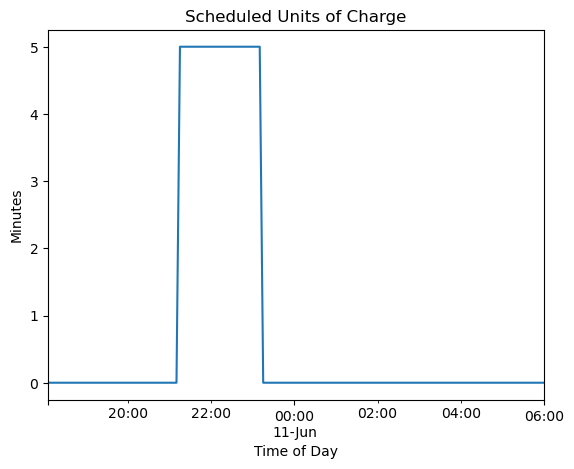

In [4]:
plot_charging_units(usage_plan)

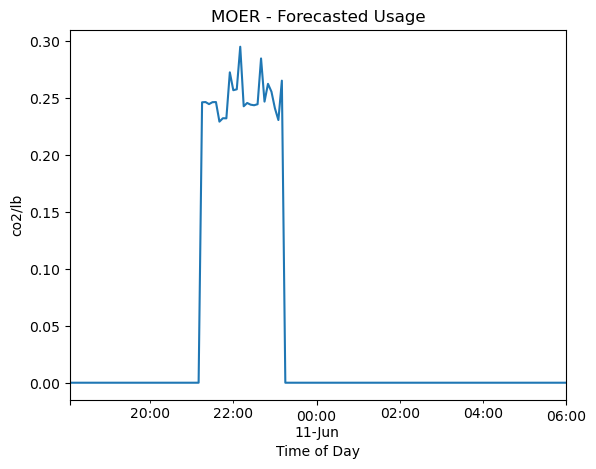

In [5]:
plot_scheduled_moer(usage_plan)

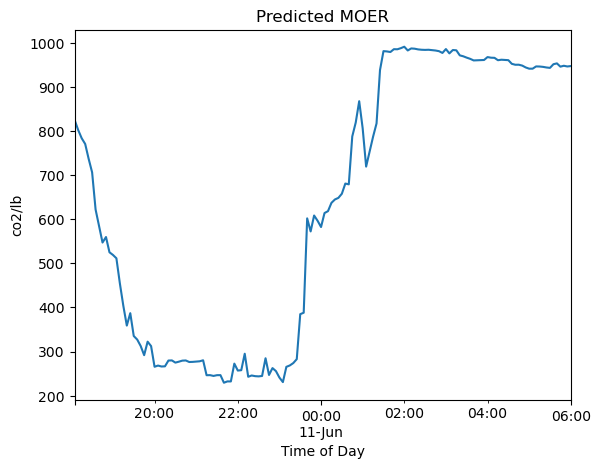

In [6]:
plot_predicated_moer(usage_plan)

## 2. Multiple segments - fixed length

In [10]:
# Pass two values to charge_per_segment instead of one.

usage_plan = wt_opt.get_optimal_usage_plan(
    region="CAISO_NORTH",
    usage_window_start=window_start,
    usage_window_end=window_end,
    usage_time_required_minutes=200, # 150 + 50
    usage_power_kw=12,
    charge_per_segment=[150,50],
    optimization_method="auto",
)

== Fixed contiguous fit! ==


In [11]:
print(usage_plan.sum())

pred_moer           92915.7000
usage                 200.0000
emissions_co2_lb       10.4163
energy_usage_mwh        0.0400
dtype: float64


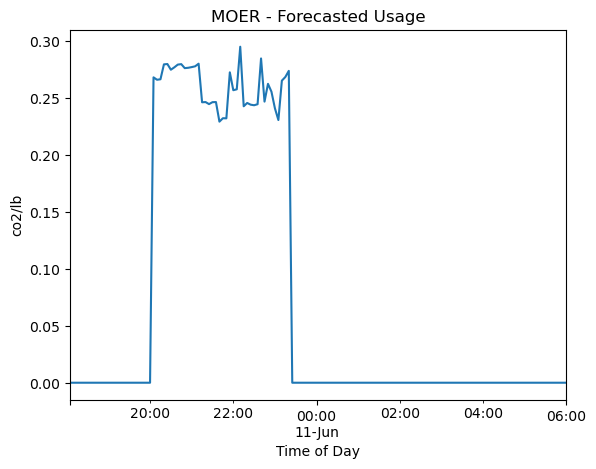

In [12]:
plot_scheduled_moer(usage_plan)

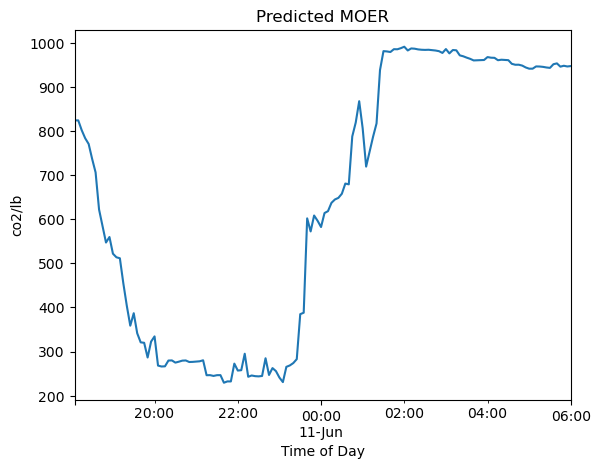

In [13]:
plot_predicated_moer(usage_plan)